In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# OneHotEncoder и стандартизация

In [2]:
# Чтение датафрейма из csv
df_ohe = pd.read_csv('data/df_feature_new.csv')

In [3]:
df_ohe.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,target,visit_hour,visit_month,visit_day,visit_season,visit_weekday,is_Moscow_region,lat,long
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,0,14,11,24,autumn,2,0,55.034639,59.529269
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,0,8,11,14,autumn,6,1,55.625578,37.606392
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,0,2,12,28,winter,1,0,56.009097,92.872515
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,mobile,Android,Xiaomi,393x786,Chrome,0,5,5,29,spring,5,1,55.625578,37.606392
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x786,Chrome,0,5,5,29,spring,5,1,55.625578,37.606392


## Стандартизация

In [4]:
std_scaler = StandardScaler()

In [5]:
# Создадим список численных переменных
numerical_values = ['visit_number', 'visit_hour', 'visit_month', 'visit_day', 'visit_weekday', 'lat', 'long']

In [6]:
std_numerical_values = std_scaler.fit_transform(df_ohe[numerical_values])

In [7]:
# Заменим числовые признаки на стандартизированные
df_ohe[numerical_values] = std_numerical_values

In [8]:
df_ohe.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,target,visit_hour,visit_month,visit_day,visit_season,visit_weekday,is_Moscow_region,lat,long
0,-0.553993,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,0,0.062170,0.758178,0.802168,autumn,-0.403258,0,0.169023,0.814880
1,-0.553993,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,0,-0.918264,0.758178,-0.335706,autumn,1.613447,1,0.225708,-0.204965
2,-0.553993,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,0,-1.898698,1.212820,1.257318,winter,-0.907434,0,0.262497,2.365996
3,-0.553993,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,mobile,Android,Xiaomi,393x786,Chrome,0,-1.408481,-1.969674,1.371105,spring,1.109271,1,0.225708,-0.204965
4,0.851660,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x786,Chrome,0,-1.408481,-1.969674,1.371105,spring,1.109271,1,0.225708,-0.204965


## OheHotEncoder

In [9]:
ohe = OneHotEncoder(sparse = False)

In [10]:
# Создадим список категориальных переменных
categorical_values = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'device_category', 'device_os', 'device_brand', 'device_screen_resolution', 'device_browser', 'visit_season']

In [11]:
ohe_categorical_values = ohe.fit_transform(df_ohe[categorical_values])

C:\Users\lenovo\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names_out()] = ohe_categorical_values.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_45544\1068616506.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

In [13]:
# Удалим категориальные переменные
df_ohe = df_ohe.drop(categorical_values, axis= 1)

# Обучение моделей

In [14]:
# x - фичи, y - целевая переменная
x = df_ohe.drop(['target'], axis = 1)
y = df_ohe.target

In [15]:
# Разделим x и y на тестовую и тренировочную выборки
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Логистическая регрессия

In [50]:
# Объявим модель логистической регрессии с гиперпараметрами max_iter = 200, C = 2 
logreg= LogisticRegression(verbose=True, random_state=42, max_iter = 200, C = 2)

In [51]:
logreg.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lenovo\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


LogisticRegression(C=2, max_iter=200, random_state=42, verbose=True)

In [52]:
predicted_test_logreg = logreg.predict_proba(x_test)

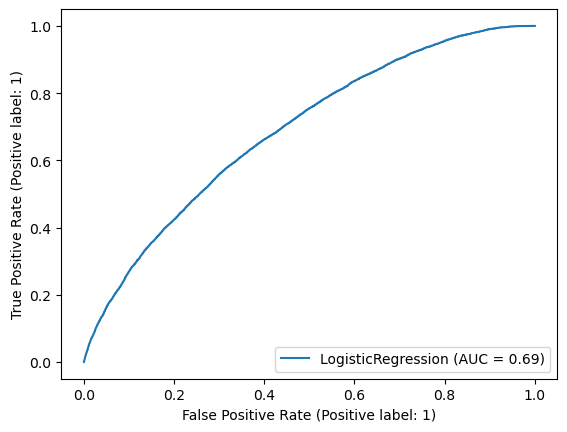

In [53]:
RocCurveDisplay.from_estimator(logreg, x_test, y_test);

In [54]:
print('Значение метрики ROC-AUC для логистической регрессии:', round(roc_auc_score(y_test, predicted_test_logreg[:,1]), 4))

Значение метрики ROC-AUC для логистической регрессии: 0.6883


## Случайный лес

In [16]:
# Объявим модель случайного леса
rf = RandomForestClassifier(bootstrap=False, n_jobs = -1, verbose= True, random_state = 42, max_depth=100, max_features='log2', min_samples_leaf=3, min_samples_split=5)

In [17]:
rf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.2min finished


RandomForestClassifier(bootstrap=False, max_depth=100, max_features='log2',
                       min_samples_leaf=3, min_samples_split=5, n_jobs=-1,
                       random_state=42, verbose=True)

In [18]:
predicted_test_rf = rf.predict_proba(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    4.1s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.9s finished


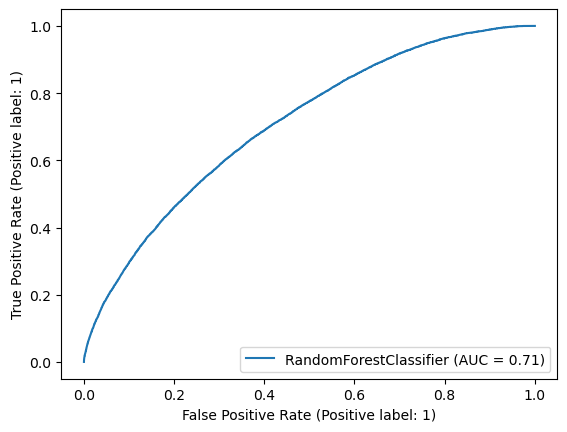

In [19]:
RocCurveDisplay.from_estimator(rf, x_test, y_test);

In [20]:
print('Значение метрики ROC-AUC для случайного леса:', round(roc_auc_score(y_test, predicted_test_rf[:,1]), 4))

Значение метрики ROC-AUC для случайного леса: 0.7077


## Многослойный персептрон

In [23]:
# Объявим многослойный персептрон
mlp = MLPClassifier(verbose= True, random_state = 42, activation = 'logistic', alpha = 0.0001, hidden_layer_sizes = (100,20))

In [24]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 0.12036454
Iteration 2, loss = 0.11810476
Iteration 3, loss = 0.11762442
Iteration 4, loss = 0.11729221
Iteration 5, loss = 0.11705091
Iteration 6, loss = 0.11689869
Iteration 7, loss = 0.11677303
Iteration 8, loss = 0.11665922
Iteration 9, loss = 0.11657195
Iteration 10, loss = 0.11647906
Iteration 11, loss = 0.11639796
Iteration 12, loss = 0.11632810
Iteration 13, loss = 0.11624103
Iteration 14, loss = 0.11616745
Iteration 15, loss = 0.11606934
Iteration 16, loss = 0.11602158
Iteration 17, loss = 0.11597092
Iteration 18, loss = 0.11589698
Iteration 19, loss = 0.11585056
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 20),
              random_state=42, verbose=True)

In [25]:
predicted_test_mlp = mlp.predict_proba(x_test)

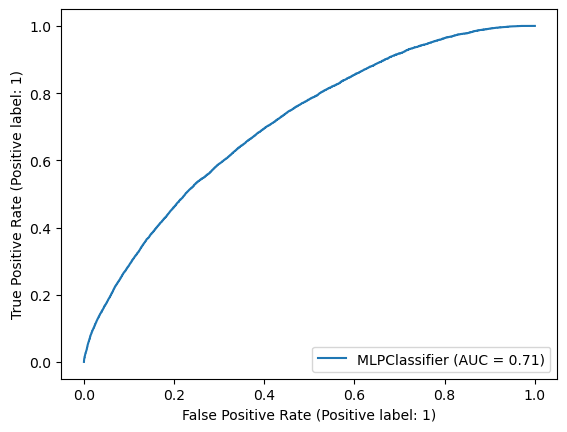

In [26]:
RocCurveDisplay.from_estimator(mlp, x_test, y_test);

In [ ]:
print('Значение метрики ROC-AUC для многослойного персептрона:', round(roc_auc_score(y_test, predicted_test_mlp[:,1]), 4))

Значение метрики ROC-AUC для случайного леса: 0.7088
